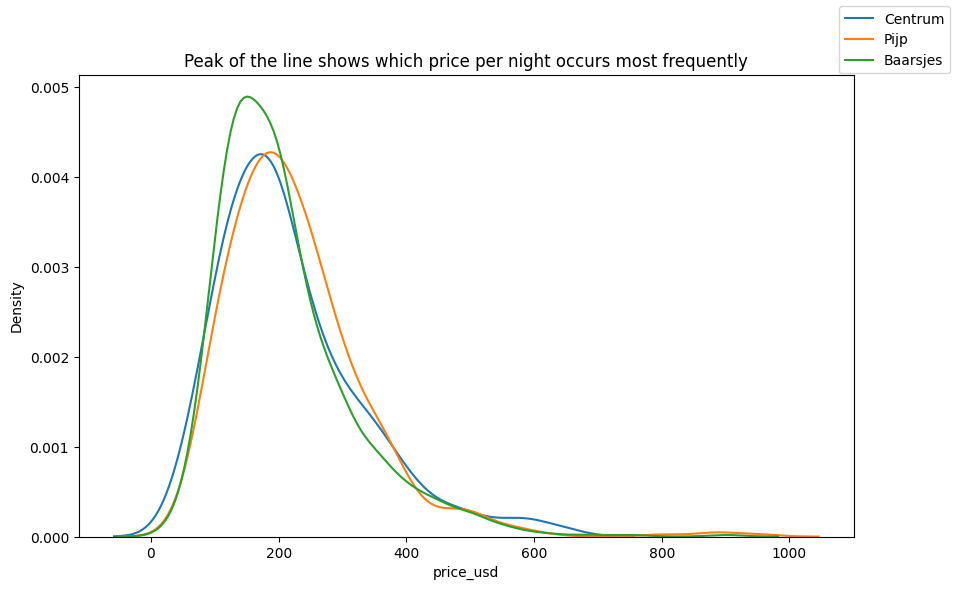

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('listings_am.csv')
df['price_usd']=df.price.str.replace('[\$\,\.]', '', regex=True).astype(int)/100
grouped_neighbourhoods=df.loc[df['neighbourhood_cleansed'].isin(['Centrum-Oost','De Pijp - Rivierenbuurt','De Baarsjes - Oud-West'])]
used_columns=grouped_neighbourhoods[['neighbourhood_cleansed','listing_url','property_type','price_usd','availability_365']]
availabilty=used_columns[(used_columns['availability_365']<60) & (used_columns['price_usd']>0)]
Centrum=availabilty[availabilty['neighbourhood_cleansed'] =='Centrum-Oost']
Pijp=availabilty[availabilty['neighbourhood_cleansed'] =='De Pijp - Rivierenbuurt']
Baarsjes=availabilty[availabilty['neighbourhood_cleansed'] =='De Baarsjes - Oud-West']
fig = plt.figure(figsize=(10,6))
sns.kdeplot(data=Centrum, x="price_usd").set_title("Peak of the line shows which price per night occurs most frequently")
sns.kdeplot(data=Pijp, x="price_usd")
sns.kdeplot(data=Baarsjes, x="price_usd")
fig.legend(labels=['Centrum','Pijp','Baarsjes'], loc='upper right')
plt.show()